# Plentina Analytics Engineering Code Challenge

This code challenge is intended to test your skills as an Analytics Engineer. We are looking to evaluate your skills in presenting interesting insights from a given data set as well as the ability to wrangle the data. Being knowledgeable in modeling is a plus, hence the bonus question to evaluate your skills in this area.

You are provided the California Traffic Collision Data. This dataset looks at collisions collected by California Highway Patrol from 2001 up to this year. The data set includes details on the collisions, where it happened, the parties involved and information on them like their age, gender and sobriety. More information can be found on the link above including the data dictionary and sample EDAs on the Kaggle dataset.

For this project, we are expecting a presentation that aims to provide recommendations that can reduce the number of fatal collisions. We would like to understand the nature of these collisions as well as understand the potential causes. Feel free to use slides, though please send them prior to the presentation. In addition to that, we would also like to have an interactive dashboard using the data provided above.

You are free to take advantage of any tools for this project. You are also free to take advantage of external datasets to enrich your output, but for this project, we will only be using the collisions(based on case ID) provided in the dataset above.

Some suggestion on things to explore:

1. When do collisions usually happen? Are they linked to a day of the week when users are more likely to
be driving under the influence of drugs or alcohol?
2. Who is usually at fault? Are the specific demographics(age/gender) that are more likely to be involved
in accidents?
3. Does the weather have an effect on the collisions? Are there seasons where collisions are
more likely to occur?
4. Which locations have a lot of collisions? Are there locations that become more accident
prone at night?
5. What is the effect of COVID-19 on the collisions? Are roads safer due to COVID?

You can also look at the Kaggle Kernels for the dataset to get some inspiration. Please don’t forget to
cite them if you use them and please use them as a starting point for further analysis.

**Bonus: Modeling**

Given the data, could you predict the number of injuries in a collision? Interpret the model to provide
recommendations on how we can reduce the number of injuries.

**Requirements**

For your submission we are expecting the following:
- Code used in the project(e.g. data processing, model development) preferably a link to a git repository
in Github
- Dashboard for this project
- Slides for your presentation if you plan to use slides.

Please submit your output via email to kenley+analyticseng@plentina.com.

Good luck and we look forward to seeing your work.

### Importing libraries

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
plt.style.use('../nikastyle.mplstyle')

np.set_printoptions(threshold=80)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)


### Importing the dataset

Since this is a hefty dataset, I'll be using 2019-2021 data for now. Based on the other Kaggle notebooks

In [16]:
con = sqlite3.connect('../../../iCloud/Employment/Plentina/switrs.sqlite')

query_2019 = '''
SELECT *
FROM collisions
WHERE date(collision_date) BETWEEN date('2019-01-01') and date('2019-12-31')
'''

query_2020 = '''
SELECT *
FROM collisions
WHERE date(collision_date) BETWEEN date('2020-01-01') and date('2020-12-31')
'''

query_2021 = '''
SELECT *
FROM collisions
WHERE date(collision_date) BETWEEN date('2021-01-01') and date('2021-12-31')
'''

In [3]:
df_2021 = pd.read_sql_query(query_2021, con, parse_dates=["collision_date"])
df_2020 = pd.read_sql_query(query_2020, con, parse_dates=["collision_date"])
df_2019 = pd.read_sql_query(query_2019, con, parse_dates=["collision_date"])


In [4]:
df_2019

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,chp_beat_type,city_division_lapd,chp_beat_class,beat_number,primary_road,secondary_road,distance,direction,intersection,weather_1,weather_2,state_highway_indicator,caltrans_county,caltrans_district,state_route,route_suffix,postmile_prefix,postmile,location_type,ramp_intersection,side_of_highway,tow_away,collision_severity,killed_victims,injured_victims,party_count,primary_collision_factor,pcf_violation_code,pcf_violation_category,pcf_violation,pcf_violation_subsection,hit_and_run,type_of_collision,motor_vehicle_involved_with,pedestrian_action,road_surface,road_condition_1,road_condition_2,lighting,control_device,chp_road_type,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,not_private_property,alcohol_involved,statewide_vehicle_type_at_fault,chp_vehicle_type_at_fault,severe_injury_count,other_visible_injury_count,complaint_of_pain_injury_count,pedestrian_killed_count,pedestrian_injured_count,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,8008498,3604.0,975,None,not chp,100000 to 250000,3604,san bernardino,0,not chp,not chp,None,not chp,None,SLOVER AV,ELM ST,297.0,east,0.0,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,1.0,property damage only,0,0,2,vehicle code violation,None,speeding,22350.0,None,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,None,daylight,functioning,0,0,0,0,1,1,NaN,pickup or panel truck,pickups & panels,0,0,0,0,0,0,0,0,0,None,None,NaN,NaN,2019-05-14,09:41:00,2019-06-04
1,8008502,3000.0,5163,951J2,not chp,50000 to 100000,3040,orange,0,not chp,not chp,None,not chp,743,CROWN VALLEY PKWY,GOLDEN LANTERN,101.0,west,0.0,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,1.0,property damage only,0,0,2,vehicle code violation,None,speeding,22350.0,None,not hit and run,broadside,other motor vehicle,no pedestrian involved,dry,normal,None,dark with street lights,functioning,0,0,0,0,1,1,NaN,passenger car,"passenger car, station",0,0,0,0,0,0,0,0,0,None,None,NaN,NaN,2019-04-30,20:06:00,2019-07-10
2,8008506,1942.0,27792,1541,not chp,>250000,1942,los angeles,0,not chp,not chp,O,not chp,15A43,MAGNOLIA BL,BLUEBELL AV,0.0,None,1.0,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,1.0,other injury,0,1,2,vehicle code violation,None,automobile right of way,21806.0,A,not hit and run,broadside,other motor vehicle,no pedestrian involved,dry,normal,None,daylight,none,0,0,0,1,0,1,NaN,motorcycle or scooter,motor driven,0,1,0,0,0,0,0,0,1,None,None,NaN,NaN,2019-05-29,09:30:00,2019-08-16
3,8008510,4113.0,469,3,not chp,50000 to 100000,4113,san mateo,0,not chp,not chp,None,not chp,003,WOODSIDE RD,MIDDLEFIELD RD,132.0,west,0.0,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,0.0,other injury,0,1,2,vehicle code violation,None,speeding,22350.0,None,not hit and run,rear end,other motor vehicle,no pedestrian involved,dry,normal,None,daylight,none,0,0,0,0,0,1,NaN,passenger car,"passenger car, station",0,1,0,0,0,0,0,0,0,None,None,NaN,NaN,2019-06-16,08:00:00,2019-08-01
4,8008514,1900.0,630201,1120,not chp,100000 to 250000,1992,los angeles,0,not chp,not chp,None,not chp,111T1,60TH ST WEST,AVENUE G,0.0,None,1.0,clear,None,0.0,None,NaN,NaN,None,None,NaN,None,None,None,1.0,other injury,0,1,2,vehicle code violation,None,automobile right of way,21802.0,A,not hit and run,broadside,other motor vehicle,no pedestrian involved,dry,normal,None,dusk or dawn,none,0,0,0,0,1,1,NaN,truck or truck tractor,three or more axle truck,0,1,0,0,0,0,0,0,0,None,None,NaN,NaN,2019-07-26,06:00:00,2019-08-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [5]:
df_2019.isna().sum()

case_id                                 0
jurisdiction                          976
officer_id                            441
reporting_district                 299701
chp_shift                               0
population                              0
county_city_location                    0
county_location                         0
special_condition                       0
beat_type                               0
chp_beat_type                           0
city_division_lapd                 440623
chp_beat_class                          0
beat_number                         29609
primary_road                            0
secondary_road                          0
distance                                0
direction                          116027
intersection                         3910
weather_1                            1381
weather_2                          453003
state_highway_indicator               215
caltrans_county                    456045
caltrans_district                 

In [6]:
df_2020.isna().sum()

case_id                                 0
jurisdiction                          730
officer_id                            293
reporting_district                 228529
chp_shift                               0
population                              0
county_city_location                    0
county_location                         0
special_condition                       0
beat_type                               0
chp_beat_type                           0
city_division_lapd                 341874
chp_beat_class                          0
beat_number                         23443
primary_road                            1
secondary_road                          2
distance                                0
direction                           92923
intersection                         2015
weather_1                            1374
weather_2                          358711
state_highway_indicator              1006
caltrans_county                    355680
caltrans_district                 

In [7]:
df_2021.isna().sum()

case_id                                 0
jurisdiction                          237
officer_id                             72
reporting_district                  92435
chp_shift                               0
population                              0
county_city_location                    0
county_location                         0
special_condition                       0
beat_type                               0
chp_beat_type                           0
city_division_lapd                 128575
chp_beat_class                          0
beat_number                          7559
primary_road                            0
secondary_road                          0
distance                                1
direction                           29141
intersection                          623
weather_1                             422
weather_2                          128835
state_highway_indicator               844
caltrans_county                    130227
caltrans_district                 

In [8]:
df_2019.columns

Index(['case_id', 'jurisdiction', 'officer_id', 'reporting_district',
       'chp_shift', 'population', 'county_city_location', 'county_location',
       'special_condition', 'beat_type', 'chp_beat_type', 'city_division_lapd',
       'chp_beat_class', 'beat_number', 'primary_road', 'secondary_road',
       'distance', 'direction', 'intersection', 'weather_1', 'weather_2',
       'state_highway_indicator', 'caltrans_county', 'caltrans_district',
       'state_route', 'route_suffix', 'postmile_prefix', 'postmile',
       'location_type', 'ramp_intersection', 'side_of_highway', 'tow_away',
       'collision_severity', 'killed_victims', 'injured_victims',
       'party_count', 'primary_collision_factor', 'pcf_violation_code',
       'pcf_violation_category', 'pcf_violation', 'pcf_violation_subsection',
       'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with',
       'pedestrian_action', 'road_surface', 'road_condition_1',
       'road_condition_2', 'lighting', 'control_devi

In [9]:
victims_query = """SELECT *
                   FROM victim
                   JOIN collisions USING (case_id)
                   WHERE """

In [10]:
df_2019['pcf_violation_category'].value_counts().index

Index(['speeding', 'improper turning', 'automobile right of way',
       'unsafe lane change', 'dui', 'traffic signals and signs',
       'unsafe starting or backing', 'unknown',
       'other than driver (or pedestrian)', 'wrong side of road',
       'following too closely', 'pedestrian right of way',
       'pedestrian violation', 'improper passing', 'other hazardous violation',
       'other improper driving', 'hazardous parking', 'other equipment',
       'impeding traffic', 'brakes', 'lights', 'fell asleep'],
      dtype='object')

### Have you looked at fault / total collisions involving that type of party? That is, are pedestrians at fault for 50% of collisions involving a pedestrian? Or just 10%? 1%? 

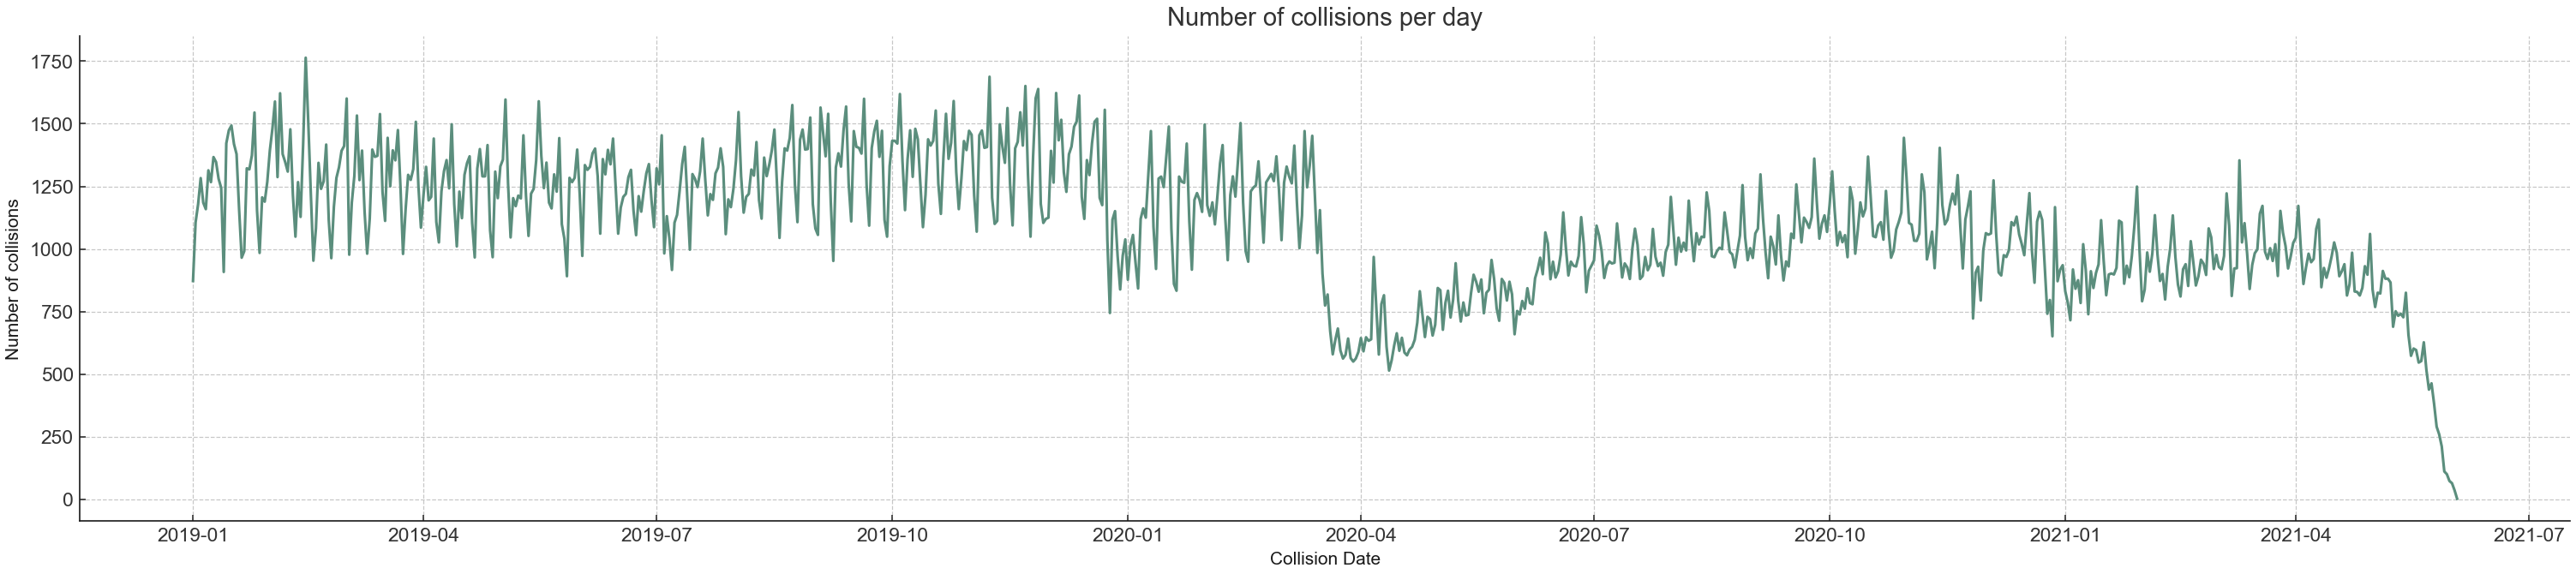

In [11]:
# https://www.kaggle.com/fabianaflores/covid-19-and-vehicle-make-analysis/notebook
fig, ax = plt.subplots(figsize=(25,5))
collisionsCount = pd.concat([df_2019.groupby('collision_date').count()['case_id'],
                            df_2020.groupby('collision_date').count()['case_id'],
                            df_2021.groupby('collision_date').count()['case_id']])
sns.lineplot(x=collisionsCount.index, y=collisionsCount.values, ax=ax)
plt.xlabel("Collision Date")
plt.ylabel("Number of collisions")
plt.title("Number of collisions per day")
plt.show();


### When do collisions usually happen? Are they linked to a day of the week when users are more likely to driving under the influence of drugs or alcohol?

In [12]:
years_df = [df_2019, df_2020, df_2021]
for year in years_df:
    year['collision_day'] = year['collision_date'].dt.dayofweek

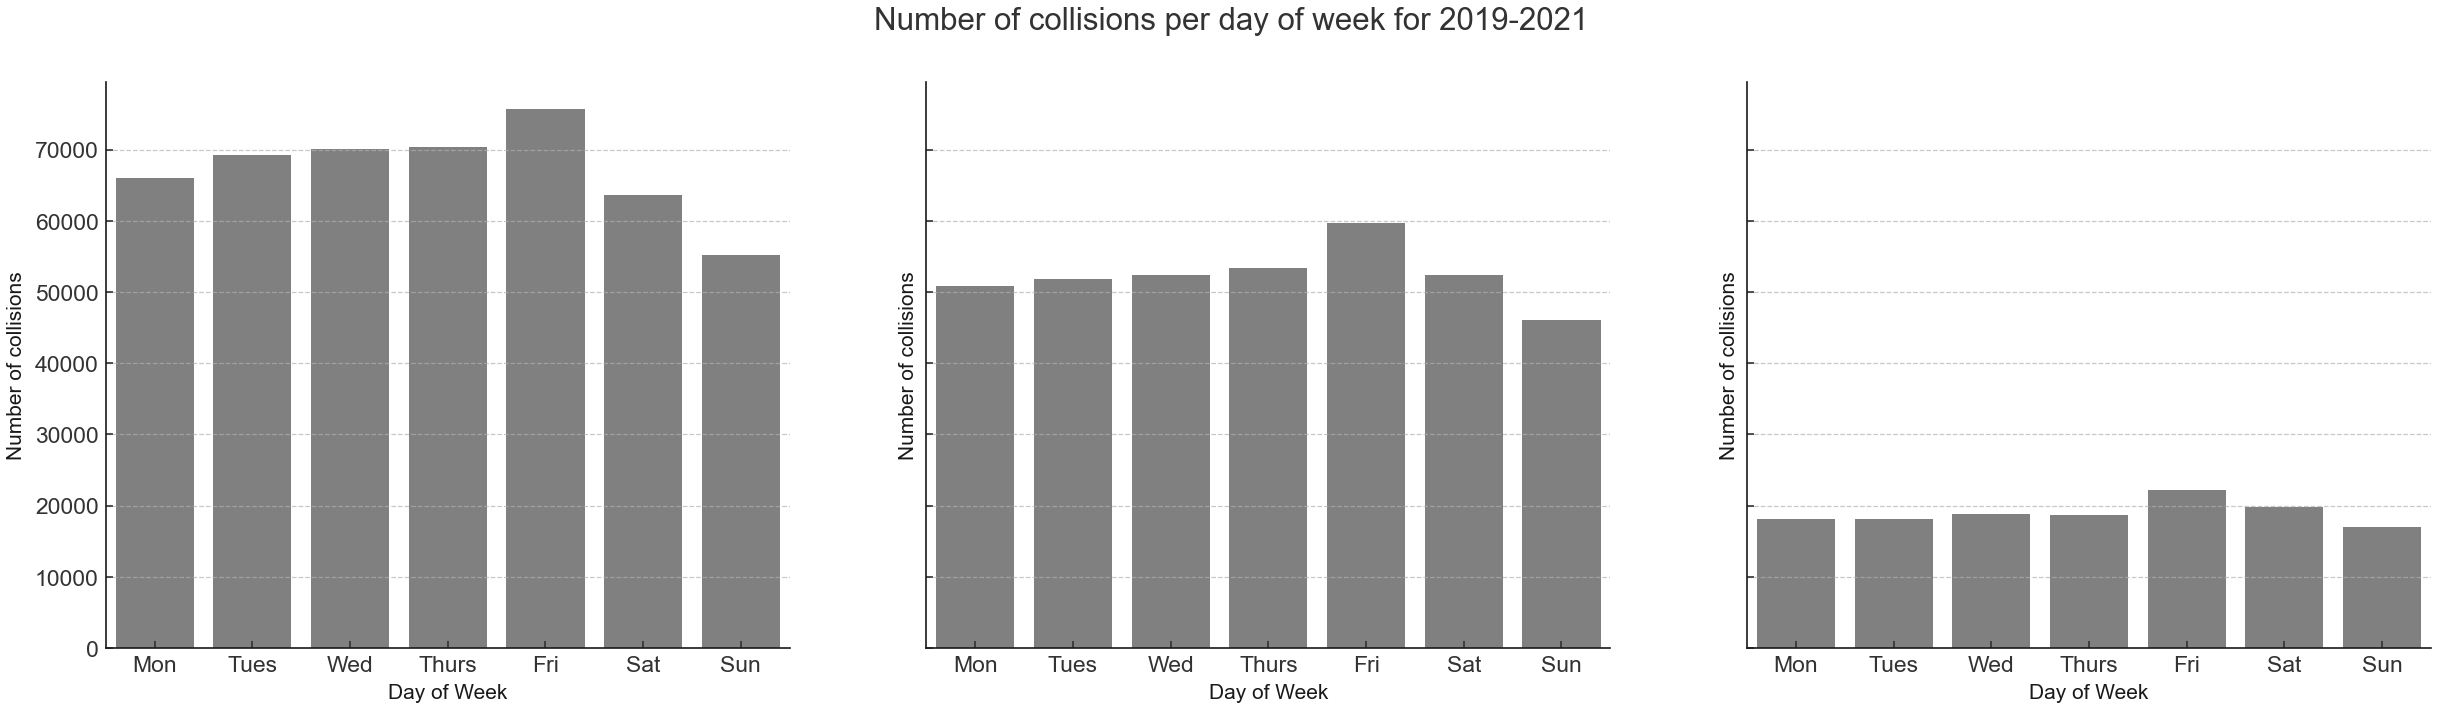

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,5), sharey=True)
for slot, year_df in zip(range(3), years_df):
        sns.barplot(ax=ax[slot], x = year_df.groupby('collision_day').count()['case_id'].index,
                                 y=year_df.groupby('collision_day').count()['case_id'].values,
                                 color="gray")
        ax[slot].set_xticklabels(["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
        ax[slot].set_xlabel("Day of Week")
        ax[slot].set_ylabel("Number of collisions")

plt.suptitle("Number of collisions per day of week for 2019-2021", fontsize=15);
# sns.barplot(ax=ax[1], x=df_2020.groupby('collision_day').count()['case_id'].index,
#                     y = df_2020.groupby('collision_day').count()['case_id'].values)

# sns.barplot(ax=ax[2], x=df_2021.groupby('collision_day').count()['case_id'].index,
#             y = df_2021.groupby('collision_day').count()['case_id'].values)


In [14]:
years_df = [df_2019, df_2020, df_2021]
for year in years_df:
    year['collision_hour'] = pd.to_datetime(year['collision_time'], format='%H:%M:%S').dt.hour

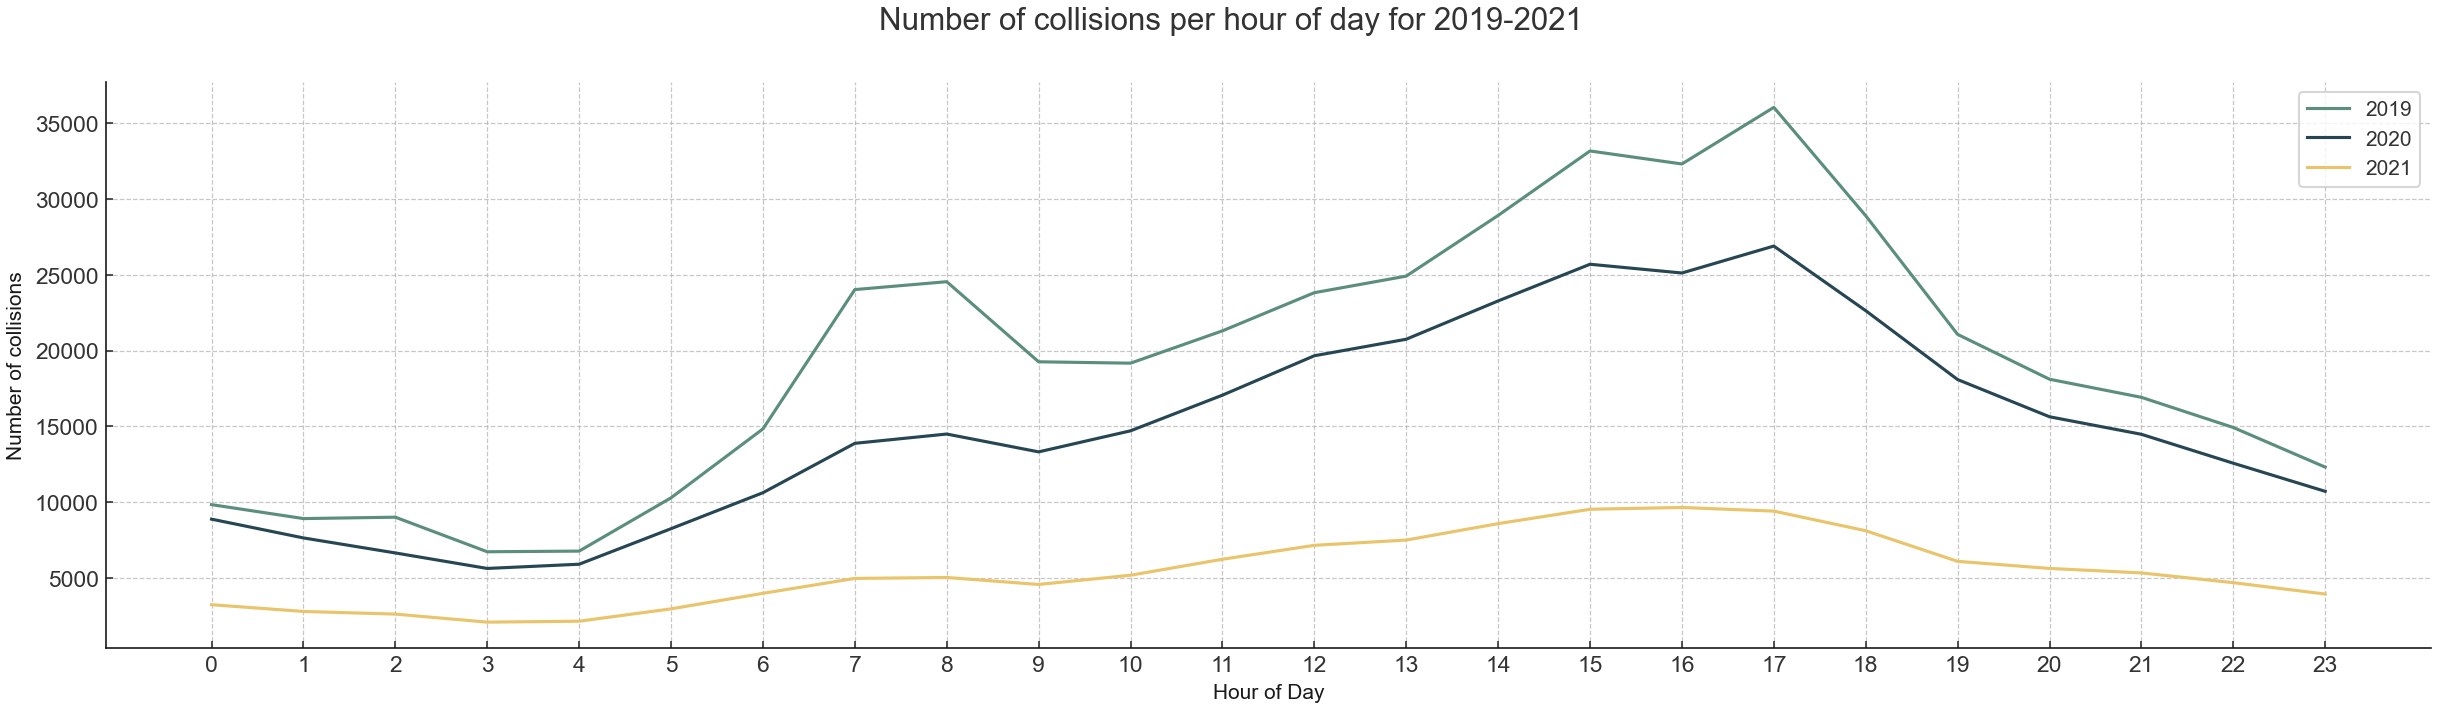

In [15]:
df_2019['collision_hour']

fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharey=True)
year_str = ['2019', '2020', '2021']
for year_df, year_name in zip(years_df, year_str):
    ax = plt.plot(year_df.groupby('collision_hour').count()['case_id'].index,
                  year_df.groupby('collision_hour').count()['case_id'].values,
                  label=year_name)
plt.xlabel("Hour of Day")
plt.ylabel("Number of collisions")
plt.legend()
plt.xticks(range(24))
plt.suptitle("Number of collisions per hour of day for 2019-2021", fontsize=15);

In [16]:
# investigating DUI cases
merged_years_df = pd.concat([df_2019, df_2020, df_2021])[
    ['case_id', 'collision_date', 'collision_hour', 'collision_day', 'pcf_violation_category']]
duiCases = merged_years_df[merged_years_df['pcf_violation_category'] ==
                   'dui']

In [17]:
df_2019['collision_hour']

fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharey=True)
year_str = ['2019', '2020', '2021']
for year_df, year_name in zip(years_df, year_str):
    duiCases = year_df[year_df['pcf_violation_category'] ==
                       'dui']
    ax = plt.plot(duiCases.groupby('collision_hour').count()['case_id'].index,
                  duiCases.groupby('collision_hour').count()['case_id'].values,
                  label=year_name)
plt.xlabel("Hour of Day")
plt.ylabel("Number of DUI collisions")
plt.legend()
plt.xticks(range(24))
plt.suptitle("Number of DUI collisions per hour of day for 2019-2021", fontsize=15);

SyntaxError: invalid syntax (<ipython-input-17-05380062406b>, line 1)

In [ ]:
duiCases2019, duiCases2020, duiCases2021 = [year_df[year_df['pcf_violation_category'] ==
                                                    'dui'][['case_id','collision_date', 
                                                    'collision_time', 'collision_hour','collision_day']] 
                                                    for year_df in years_df]


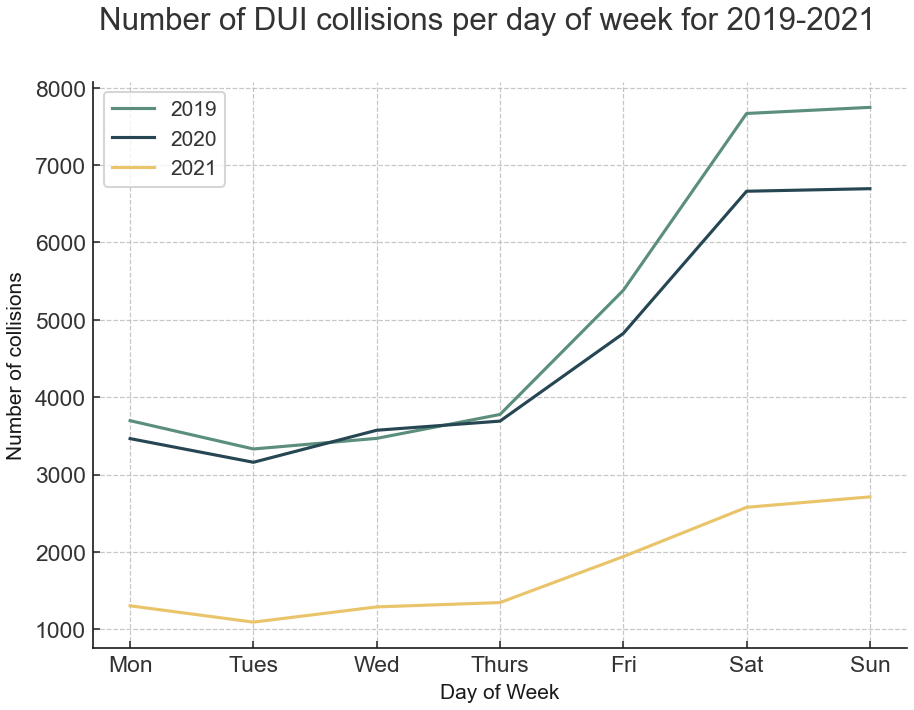

In [ ]:
year_str=['2019', '2020', '2021']
days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
fig, ax = plt.subplots(1, 1)

duiCases2019plt = ax.plot(duiCases2019.groupby('collision_day').count()['case_id'].index,
                          duiCases2019.groupby('collision_day').count()['case_id'].values, 
                          label='2019')
duiCases2020plt = ax.plot(duiCases2020.groupby('collision_day').count()['case_id'].index,
                          duiCases2020.groupby('collision_day').count()['case_id'].values,
                          label='2020')
duiCases2021plt = ax.plot(duiCases2021.groupby('collision_day').count()['case_id'].index,
                          duiCases2021.groupby('collision_day').count()[
    'case_id'].values,
    label='2021')
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of collisions")
ax.legend()
ax.set_xticks(duiCases2019.groupby('collision_day').count()['case_id'].index)
ax.set_xticklabels(days)

plt.suptitle("Number of DUI collisions per day of week for 2019-2021", fontsize=15);

#ax.set_xticklabels([x for x in ])
#plt.gca().set_xticklabels(["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])


In [ ]:
duiCasesYears = [duiCases2019, duiCases2020, duiCases2021]
duiCasesDaily = pd.concat([duiCasesYear.groupby(duiCasesYear['collision_date']).count()[
                          'case_id'] for duiCasesYear in duiCasesYears]).reset_index()
duiCasesDaily['collision_year'] = duiCasesDaily['collision_date'].dt.year


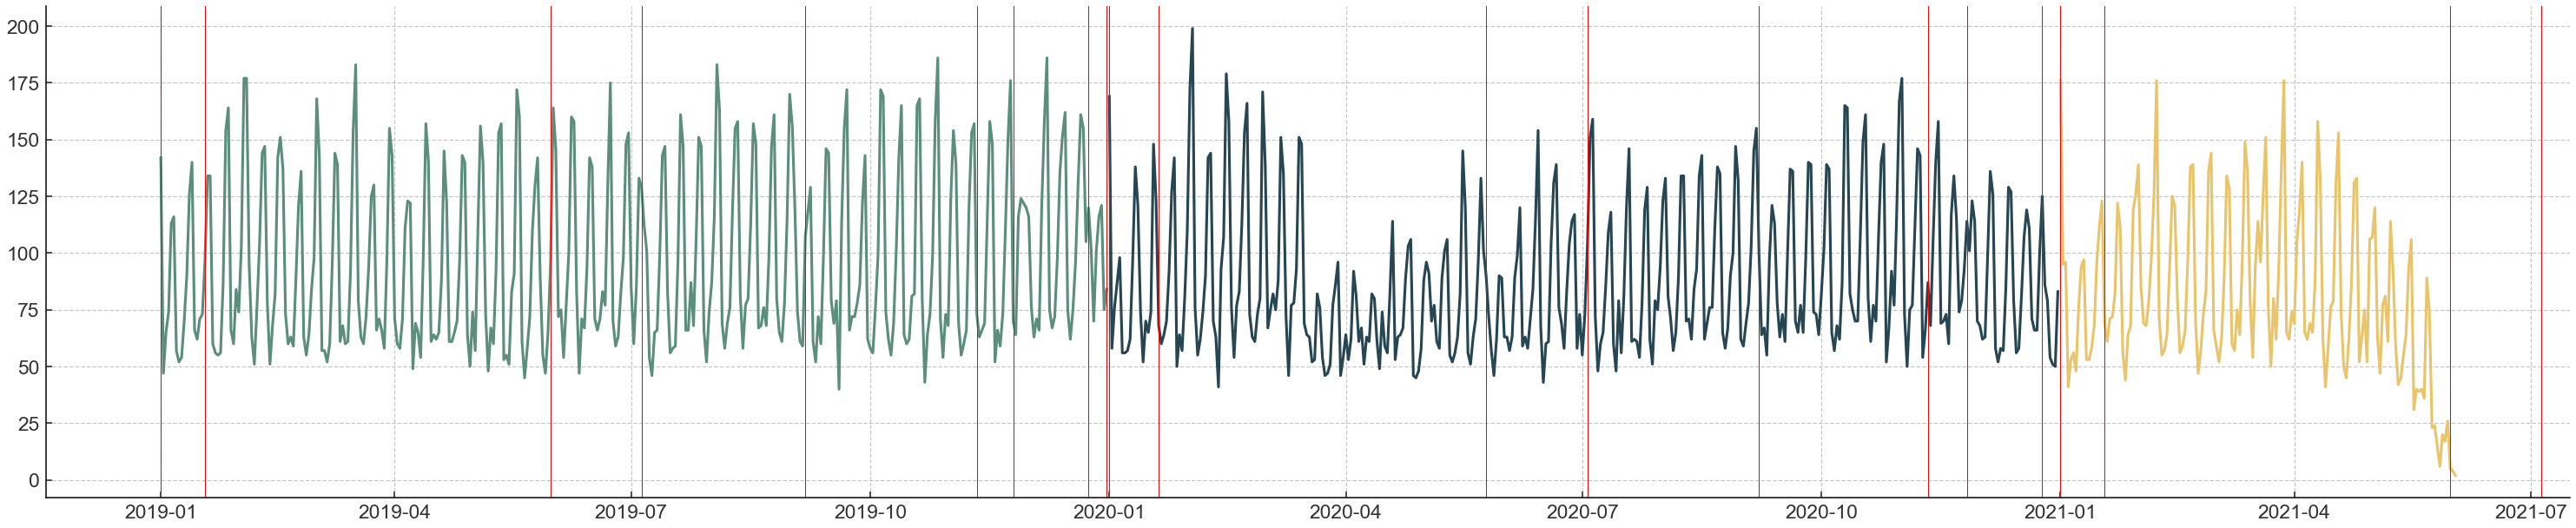

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(25,5))
ts2019 = ax.plot(duiCasesDaily[duiCasesDaily['collision_year'] == 2019]['collision_date'],
                 duiCasesDaily[duiCasesDaily['collision_year'] == 2019]['case_id'],
                 label="2019")
ts2020 = ax.plot(duiCasesDaily[duiCasesDaily['collision_year'] == 2020]['collision_date'],
                 duiCasesDaily[duiCasesDaily['collision_year']
                               == 2020]['case_id'],
                 label="2020")
ts2021 = ax.plot(duiCasesDaily[duiCasesDaily['collision_year'] == 2021]['collision_date'],
                 duiCasesDaily[duiCasesDaily['collision_year']
                               == 2021]['case_id'],
                 label="2021")

holidaysListStr = pd.Series(['2021-01-01', '2021-01-18', '2021-05-31', '2021-07-05',
                             '2020-01-01', '2020-01-20', '2020-05-25', '2020-07-03', '2020-09-07', '2020-11-11', '2020-11-26', '2020-12-25',
                             '2019-01-01', '2019-01-18', '2019-05-31', '2019-07-05', '2019-09-06', '2019-11-11', '2019-11-25', '2019-12-24', '2019-12-31'])
holidaysListDT = pd.to_datetime(holidaysListStr, infer_datetime_format=True)
for holiday in holidaysListDT:
    plt.axvline(x=holiday, color='red', linewidth=0.5)


In [ ]:
# https: // www.kaggle.com/alexgude/switrs-increase-in-traffic-fatalities-after-covid
DATE_COL = ""
CRASH_COL = "crashes"
FATALITY_COL = "fatalities"

fatalityQuery = """
    SELECT collision_date
        , 1 as crashes
        , IIF(COLLISION_SEVERITY='fatal', 1, 0) as fatalitiesCount
    FROM collisions 
    WHERE collision_date IS NOT NULL 
    AND date(collision_date) BETWEEN date('2019-01-01') AND date('2021-12-31')
"""

fatalityRateDF = pd.read_sql_query(fatalityQuery, con, parse_dates=["collision_date"]).groupby('collision_date').agg('sum')

In [ ]:
weeklyFatalityRateDF = fatalityRateDF.resample('W-MON').sum()
weeklyFatalityRateDF['fatalitiesRate'] = weeklyFatalityRateDF['fatalitiesCount'] / \
    weeklyFatalityRateDF['crashes']

In [ ]:
dateMask = (fatalityRateDF.index >= datetime(2021,1,1)) & (
    fatalityRateDF.index <= datetime(2021,1,31))
maskedFatalityRateDF = fatalityRateDF.loc[dateMask]
fatalityRateDF


,crashes,fatalitiesCount
collision_date,,
2019-01-01,872,13
2019-01-02,1106,7
2019-01-03,1179,9
2019-01-04,1283,6
2019-01-05,1185,10
...,...,...
2021-05-30,100,0
2021-05-31,73,0
2021-06-01,64,0


In [ ]:
df_2019.pivot_table(values=,
                    columns='collision_date', 
                    aggfunc=)
# fatalityRateDF = 

# df = df.astype({
#     f"{DATE_COL}": "datetime64[ns]",
#     CRASH_COL: "int32",
#     FATALITY_COL: "int32",
# })

# ts = df[[DATE_COL, CRASH_COL, FATALITY_COL]]
# ts.index = ts[DATE_COL]

# ts_series = ts.resample('W-MON').sum()

# ts_series["fatality_rate"] = ts_series[FATALITY_COL] / ts_series[CRASH_COL]


In [17]:
query = '''
SELECT case_id, latitude, longitude, collision_date, SUBSTR(county_city_location, -4, 2) AS county_code,
    collision_time, weather_1, weather_2, collision_severity, chp_beat_type,
    severe_injury_count, other_visible_injury_count, 
    complaint_of_pain_injury_count, pedestrian_killed_count,
    pedestrian_injured_count, bicyclist_killed_count,
    bicyclist_injured_count, motorcyclist_killed_count,
    motorcyclist_injured_count, killed_victims, injured_victims,
    party_count, primary_collision_factor, pcf_violation_code,
    pcf_violation_category, pcf_violation, pcf_violation_subsection,
    lighting, road_surface, road_condition_1, road_condition_2, 
    pedestrian_collision, bicycle_collision, motorcycle_collision, truck_collision,
    alcohol_involved, hit_and_run
FROM collisions
WHERE collision_date IS NOT NULL
AND collision_time IS NOT NULL
AND chp_beat_type IS NOT 'interstate'
AND date(collision_date) BETWEEN date('2020-06-01') and date('2021-12-31')
'''
             
df = pd.read_sql_query(query, con, parse_dates=['collision_date'])

In [4]:
df['pcf_violation_category'].value_counts(normalize=True)#/df['case_id'].count()



In [23]:
pd.DataFrame(df['pcf_violation_category'].value_counts(
    normalize=True)).rename(columns={'pcf_violation_category': '% of all collisions'})*100


In [ ]:
df['collision_hour'] = pd.to_datetime(df['collision_time'], format='%H:%M:%S').dt.hour

plt.plot(df.groupby('collision_hour').count()['case_id'].index,
                  df.groupby('collision_hour').count()['case_id'].values)

Error: Kernel is dead

In [ ]:
df_test = df[['collision_date', 'latitude', 'longitude', 'pedestrian_collision', 'bicycle_collision',
              'motorcycle_collision', 'truck_collision', 'injured_victims', 'killed_victims']]
# bikeBool =True
# truckBool =True 
# pedBool = False
# motorBool = True

# bikeMask = (df['bike_collision'] == 1)
# truckMask = (df['truck_collision'] == 1)
# pedMask = (df['pedestrian_collision'] == 1)
# motorMask = (df['motorcycle_collision'] == 1)
# masksList = [bikeMask, truckMask, pedMask, motorMask]
# boolList = [bikeBool, truckBool, pedBool, motorBool]
# test_dict = dict(zip(masksList, boolList))
# collisionMask = [mask for mask in test_dict.keys() if test_dict.values()==True]
# collisionMask


# dateMask = (pd.to_datetime(df_test['collision_date']) >= datetime(2021, 1, 1)) & (
#     pd.to_datetime(df_test['collision_date']) <= datetime(2021, 12, 31))

# testing123 = df_test.loc[dateMask]


In [19]:
df['alcohol_involved']


0         NaN
1         1.0
2         1.0
3         NaN
4         NaN
         ... 
284992    NaN
284993    NaN
284994    1.0
284995    NaN
284996    NaN
Name: alcohol_involved, Length: 284997, dtype: float64

In [ ]:
df_test.loc[(df_test['pedestrian_collision'] == False) |
        (df_test['truck_collision'] == False) |
        (df_test['bicycle_collision'] == False) |
        (df_test['motorcycle_collision'] == False)]


,collision_date,latitude,longitude,pedestrian_collision,bicycle_collision,motorcycle_collision,truck_collision,injured_victims,killed_victims
0,2021-02-24,NaN,NaN,0,0,0,0,0,0
1,2021-01-01,38.26548,-122.04981,0,0,0,0,0,0
2,2021-01-02,NaN,NaN,0,0,0,0,0,0
3,2021-01-01,38.26864,-122.04289,0,0,0,0,2,0
4,2021-01-02,38.26315,-122.02491,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
132765,2021-04-27,37.97010,-121.27799,0,0,0,0,0,0
132766,2021-03-29,38.01071,-121.32111,0,0,0,0,0,0
132767,2021-04-29,37.97171,-121.30026,0,0,0,0,0,0
132768,2021-04-01,NaN,NaN,0,0,0,0,1,0


### Who is usually at fault? Are the specific demographics(age/gender) that are more likely to be involved in accidents?

### Does the weather have an effect on the collisions? Are there seasons where collisions are more likely to occur?

California is a sunny place. A lot of people have used it as part of their analysis, given the amount of effort and the number of code blocks exerted on using this information, but for California specifically it's not a huge factor in collisions unlike other parts of the US. The dataset is actually imbalanced on this regard.

### Which locations have a lot of collisions? Are there locations that become more accident prone at night?

Besides location, I also wanted to look at road conditions.

<ipython-input-22-3f14786127d5>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45);


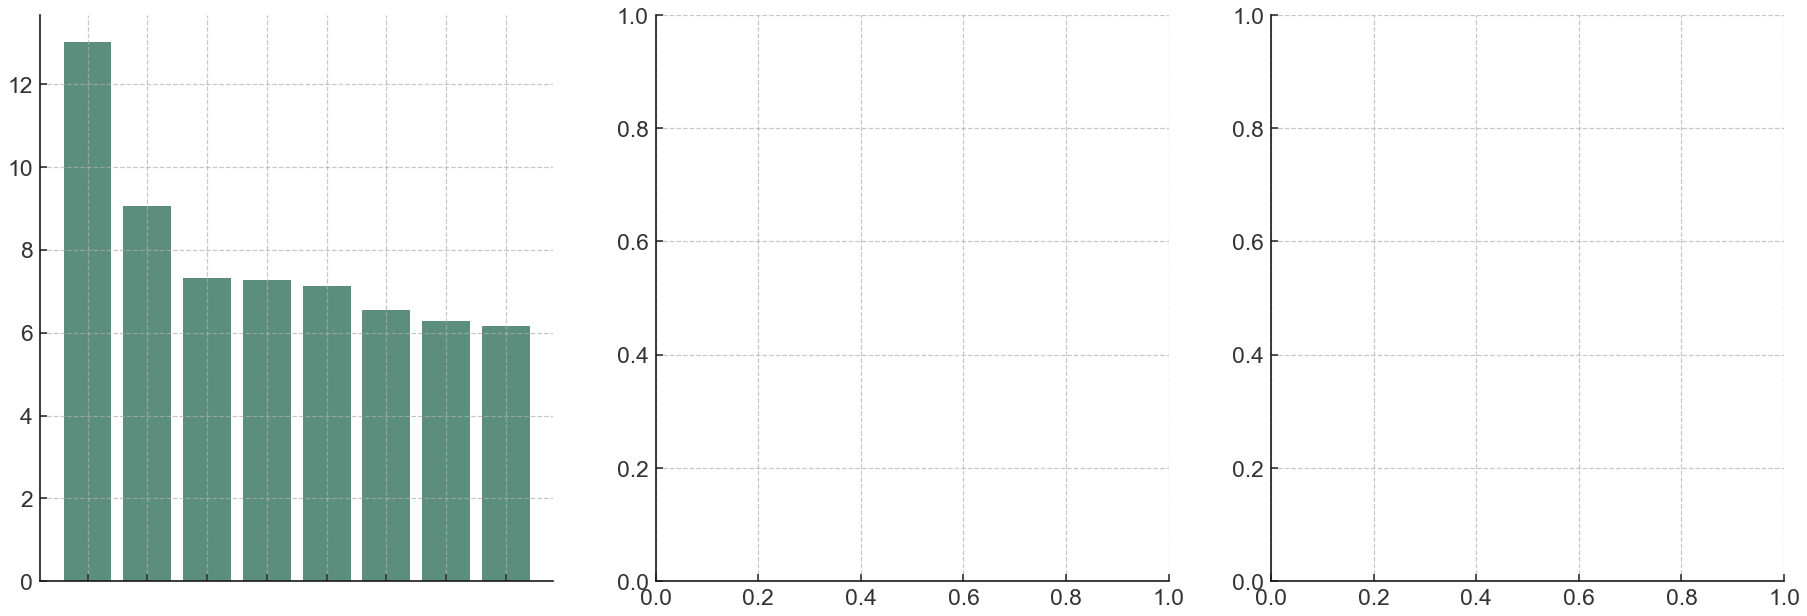

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
logRoadCondition = np.log(df_2019['road_condition_1'].value_counts())

ax[0].bar(logRoadCondition.index, logRoadCondition.values)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45);

### What is the effect of COVID-19 on the collisions? Are roads safer due to COVID?

In [ ]:
query_coli_part1 = """SELECT c.case_id, p.*
                   FROM collisions as c INNER JOIN parties as p ON c.case_id = p.case_id
                   WHERE date(c.collision_date) BETWEEN date('2020-01-01') and date('2020-12-31')
"""
df_parties_2020 = pd.read_sql_query(
    query_coli_part1, con)


In [ ]:
df_parties_2020


,case_id,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,party_safety_equipment_1,party_safety_equipment_2,financial_responsibility,hazardous_materials,cellphone_in_use,cellphone_use_type,school_bus_related,oaf_violation_code,oaf_violation_category,oaf_violation_section,oaf_violation_suffix,other_associate_factor_1,other_associate_factor_2,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,statewide_vehicle_type,chp_vehicle_type_towing,chp_vehicle_type_towed,party_race
0,0081715,1,0081715,1,driver,1,female,35.0,not applicable,not applicable,north,air bag deployed,lap/shoulder harness used,proof of insurance obtained,NaN,0.0,cellphone not in use,NaN,None,None,None,None,none apparent,None,0,0,proceeding straight,2007.0,ford,None,None,None,other
1,0081715,2,0081715,2,driver,0,female,43.0,not applicable,not applicable,north,air bag not deployed,lap/shoulder harness used,proof of insurance obtained,NaN,0.0,cellphone not in use,NaN,None,None,None,None,none apparent,None,0,0,proceeding straight,2019.0,None,None,None,None,hispanic
2,0726202,3,0726202,1,driver,1,None,NaN,impairment unknown,G,north,None,None,None,NaN,NaN,None,NaN,None,None,None,None,none apparent,None,0,0,proceeding straight,2005.0,None,passenger car,"passenger car, station",None,None
3,8008483,5576850,8008483,1,driver,1,male,27.0,"had been drinking, under influence",None,west,air bag not deployed,lap/shoulder harness used,no proof of insurance obtained,NaN,0.0,cellphone not in use,NaN,None,improper turning,22107,None,violation,None,0,0,proceeding straight,1989.0,None,passenger car,"passenger car, station",None,hispanic
4,8008483,5576851,8008483,2,parked vehicle,0,None,NaN,not applicable,not applicable,west,None,None,not applicable,NaN,NaN,None,NaN,None,None,None,None,none apparent,None,0,0,parked,2014.0,None,pickup or panel truck,pickups & panels,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712533,9160890,10886698,9160890,1,driver,1,male,62.0,"had been drinking, under influence",None,west,air bag not deployed,lap/shoulder harness used,proof of insurance obtained,NaN,0.0,cellphone not in use,NaN,None,unsafe speed,22350,None,violation,None,0,0,proceeding straight,2017.0,None,passenger car,"passenger car, station",None,white
712534,9160890,10886699,9160890,2,parked vehicle,0,None,NaN,not applicable,not applicable,None,None,None,not applicable,NaN,NaN,None,NaN,None,None,None,None,none apparent,None,0,0,parked,2011.0,None,passenger car,"passenger car, station",None,None
712535,9162606,10887644,9162606,1,driver,1,male,44.0,impairment unknown,G,west,air bag not deployed,lap/shoulder harness used,proof of insurance obtained,NaN,NaN,None,NaN,None,None,None,None,none apparent,None,0,0,ran off road,2017.0,None,passenger car,"passenger car, station",None,hispanic
712536,9164194,10889085,9164194,1,driver,1,female,24.0,impairment unknown,G,west,air bag deployed,lap/shoulder harness used,no proof of insurance obtained,NaN,0.0,cellphone not in use,NaN,None,None,None,None,none apparent,None,0,1,proceeding straight,2016.0,audi,passenger car,"passenger car, station",None,black


In [66]:
popdata = pd.read_csv('county_population.csv')
popdata['CTYNAME'] = popdata['CTYNAME'].map(lambda x: x.replace(r' County', ''))
revpopdata = popdata.sort_values('CTYNAME').reset_index(drop=True)
revpopdata.to_csv('california_population_data.csv')


In [3]:
query = '''
SELECT case_id, latitude, longitude, collision_date, SUBSTR(county_city_location, -4, 2) AS county_code,
    population,
    collision_time, weather_1, weather_2, collision_severity,
    severe_injury_count, other_visible_injury_count, 
    complaint_of_pain_injury_count, pedestrian_killed_count,
    pedestrian_injured_count, bicyclist_killed_count,
    bicyclist_injured_count, motorcyclist_killed_count,
    motorcyclist_injured_count, killed_victims, injured_victims,
    party_count, primary_collision_factor, pcf_violation_code,
    pcf_violation_category, pcf_violation, pcf_violation_subsection,
    lighting, road_surface, road_condition_1, road_condition_2, 
    pedestrian_collision, bicycle_collision, motorcycle_collision, truck_collision,
    alcohol_involved, hit_and_run
FROM collisions
WHERE collision_date IS NOT NULL
AND collision_time IS NOT NULL
AND date(collision_date) BETWEEN date('2021-01-01') and date('2021-12-31')
'''
df = pd.read_sql_query(query, con,
                    parse_dates=['collision_date'])

In [ ]:
df['pcf_violation_category'].value_counts()/len(df)

Error: Kernel is dead

In [25]:
pd.DataFrame(df.groupby(
    'collision_date').sum()['killed_victims'])
#)['case_id']).rename(columns = {'case_id': "Number of fatalities"}


,killed_victims
collision_date,
2020-06-01,13
2020-06-02,7
2020-06-03,5
2020-06-04,6
2020-06-05,11
...,...
2021-05-30,0
2021-05-31,0
2021-06-01,0


In [89]:
county_codes = {
    '01': 'Alameda',
    '02': 'Alpine',
    '03': 'Amador',
    '04': 'Butte',
    '05': 'Calaveras',
    '06': 'Colusa',
    '07': 'Contra Costa',
    '08': 'Del Norte',
    '09': 'El Dorado',
    '10': 'Fresno',
    '11': 'Glenn',
    '12': 'Humboldt',
    '13': 'Imperial',
    '14': 'Inyo',
    '15': 'Kern',
    '16': 'Kings',
    '17': 'Lake',
    '18': 'Lassen',
    '19': 'Los Angeles',
    '20': 'Madera',
    '21': 'Marin',
    '22': 'Mariposa',
    '23': 'Mendocino',
    '24': 'Merced',
    '25': 'Modoc',
    '26': 'Mono',
    '27': 'Monterey',
    '28': 'Napa',
    '29': 'Nevada',
    '30': 'Orange',
    '31': 'Placer',
    '32': 'Plumas',
    '33': 'Riverside',
    '34': 'Sacramento',
    '35': 'San Benito',
    '36': 'San Bernardino',
    '37': 'San Diego',
    '38': 'San Francisco',
    '39': 'San Joaquin',
    '40': 'San Luis Obispo',
    '41': 'San Mateo',
    '42': 'Santa Barbara',
    '43': 'Santa Clara',
    '44': 'Santa Cruz',
    '45': 'Shasta',
    '46': 'Sierra',
    '47': 'Siskiyou',
    '48': 'Solano',
    '49': 'Sonoma',
    '50': 'Stanislaus',
    '51': 'Sutter',
    '52': 'Tehama',
    '53': 'Trinity',
    '54': 'Tulare',
    '55': 'Tuolumne',
    '56': 'Ventura',
    '57': 'Yolo',
    '58': 'Yuba',
}


In [99]:


retrieveCountyName(county_codes, 'El Dorado')


'09'

In [119]:
def retrieveCountyName(dict, search_age):
    for code, county in dict.items():
        if county == search_age:
            return code

countyFilter = (df['county_code'] == retrieveCountyName(county_codes, specificCountyFilter))
dateMask = (df['collision_date'] >= datetime(2021, 1, 1)) & (
    df['collision_date'] <= datetime(2021, 1, 31))
df.loc[dateMask].loc[pd.IndexSlice[slice(None)]][[
    'latitude', 'longitude']].dropna().drop_duplicates()


,latitude,longitude
1,38.26548,-122.04981
3,38.26864,-122.04289
4,38.26315,-122.02491
5,36.72858,-119.74553
6,33.89963,-117.57478
...,...,...
131323,38.18075,-121.69615
131327,38.05354,-122.15822
131329,38.08668,-122.11369
131331,33.94400,-117.01694


In [11]:
pd.DataFrame(df.groupby('collision_hour').count()['case_id']).rename(columns={'case_id': "Number of collisions"})


,Number of collisions
collision_hour,
0,8764
1,7487
2,6542
3,5564
4,5834
5,7961
6,10141
7,12216
8,12726
